## Logistic Regression

邏輯回歸的數學模型:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )$$ 

其中，$g(z)$稱作 Sigmoid 或 Logistic Function

$$g(z) = \frac{1}{1+e^{-z}}\tag{3}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def model(x, w, b):
    z = np.matmul(x, w) + b
    return sigmoid(z)

## Logistic Loss Function

邏輯回歸的成本(Cost)更適合用損失(Loss)函數計算

>定義上:  
**Loss** 用來測量單一資料的差異  
**Cost** 用來測量整個訓練集的差異

定義上: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ 是單筆資料的損失:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ 是第$i$筆資料的預測，$y^{(i)}$ 是第$i$筆資料的分類，以0，1表示

可以簡化計算成
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [4]:
def computeCost(x, y, w, b):
    pred = model(x, w, b)
    loss = - (y * np.log(pred) + (1 - y) * np.log(1 - pred))
    return np.mean(loss)

In [5]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])    
w = np.array([1,1])
b = -3
print(computeCost(x, y, w, b))

0.36686678640551745


## Logistic Gradient Descent

邏輯回歸的梯度下降一樣是:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

其中:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

* 唯一的差別是:  
    $f_{\mathbf{w},b}(x) = g(z)$
  
    $g(z) = \frac{1}{1+e^{-z}}$
  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  

In [6]:
def computeGradient(x, y, w, b):
    pred = model(x, w, b)
    err = model(x, w, b) - y
    err = np.expand_dims(err, axis = 1)
    gradW = np.mean(err * x, axis = 0)
    gradB = np.mean(err)
    return gradW, gradB

In [7]:
def gradientDescent(x, y, w, b, alpha, iterCount):
    costs = []
    for i in range(iterCount):
        gradW, gradB = computeGradient(x, y, w, b)
        w = w - alpha * gradW
        b = b - alpha * gradB
        cost = computeCost(x, y, w, b)
        costs.append(cost)
        if i % (iterCount / 10) == 0:
            print(f"iter: {i}, cost: {cost:0.5f}")
    return w, b, costs

In [8]:
w = np.zeros_like(w)
b = 0
w, b, _ = gradientDescent(x, y, w, b, 0.1, 10000)

iter: 0, cost: 0.68461
iter: 1000, cost: 0.15910
iter: 2000, cost: 0.08460
iter: 3000, cost: 0.05705
iter: 4000, cost: 0.04291
iter: 5000, cost: 0.03434
iter: 6000, cost: 0.02860
iter: 7000, cost: 0.02450
iter: 8000, cost: 0.02142
iter: 9000, cost: 0.01903


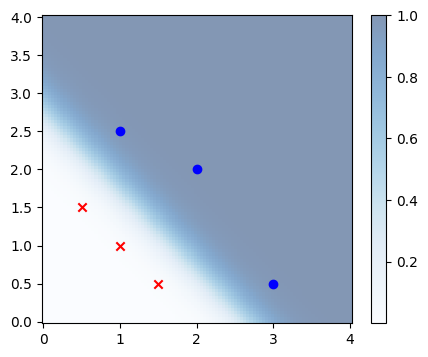

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))

xSpace0 = np.linspace(0, 4, 100)
xSpace1 = np.linspace(0, 4, 100)
xx0, xx1 = np.meshgrid(xSpace0, xSpace1)
predMatrix = np.zeros_like(xx0)
for i in range(len(xSpace0)):
    for j in range(len(xSpace1)):
        predMatrix[i, j] = model([xx0[i, j], xx1[i, j]], w, b)

pcm = ax.pcolormesh(xx0, xx1, predMatrix, cmap = plt.get_cmap('Blues'), shading='nearest', alpha = 0.5)
ax.figure.colorbar(pcm, ax = ax)

trueIndex = y == 1
falseIndex = y == 0
ax.scatter(x[trueIndex, 0], x[trueIndex, 1], marker = "o", color = "blue")
ax.scatter(x[falseIndex, 0], x[falseIndex, 1], marker = "x", color = "red")